In [1]:
import requests as rq
import time
import random
import lxml
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
matplotlib.rcParams['pdf.fonttype'] = 42
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

/Users/boostigooff/.pyenv/versions/3.7.1/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


## Movie

In [2]:
response = rq.get('http://www.hogwartsishere.com/library/book/7391/')
doc = BeautifulSoup(response.text)


/Users/boostigooff/.pyenv/versions/3.7.1/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/boostigooff/.pyenv/versions/3.7.1/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [3]:
episodes = []
results = doc.find_all('li', class_="hover-white")
for result in results:
    episode = result.find('a')['href']
    episodes.append(episode)
episodes

['/library/book/7391/chapter/1/',
 '/library/book/7391/chapter/2/',
 '/library/book/7391/chapter/3/',
 '/library/book/7391/chapter/4/',
 '/library/book/7391/chapter/5/',
 '/library/book/7391/chapter/6/',
 '/library/book/7391/chapter/7/',
 '/library/book/7391/chapter/8/']

In [4]:
full_urls = []
for url in episodes:
    url = f"http://www.hogwartsishere.com/{url}"
    full_urls.append(url)
full_urls

['http://www.hogwartsishere.com//library/book/7391/chapter/1/',
 'http://www.hogwartsishere.com//library/book/7391/chapter/2/',
 'http://www.hogwartsishere.com//library/book/7391/chapter/3/',
 'http://www.hogwartsishere.com//library/book/7391/chapter/4/',
 'http://www.hogwartsishere.com//library/book/7391/chapter/5/',
 'http://www.hogwartsishere.com//library/book/7391/chapter/6/',
 'http://www.hogwartsishere.com//library/book/7391/chapter/7/',
 'http://www.hogwartsishere.com//library/book/7391/chapter/8/']

In [5]:
urltest = "http://www.hogwartsishere.com//library/book/7391/chapter/1/"
response = rq.get(urltest)
doc = BeautifulSoup(response.content)
line_text = []
scripts = doc.find('div', class_="font-size-16 roboto")

print(scripts)

#for script in scripts:
#    line_text.append(script.contents)
#    print(line_text)

<div class="font-size-16 roboto">
                            	Scene:<br/><br/>A neighbourhood on a street called Privet Drive. An owl, sitting on the street sign flies off to reveal a mysterious appearing old man walking through a forest near the street. He stops at the start of the street and takes out a mechanical device and zaps all the light out of the lampposts. He puts away the device and a cat meows. The man, ALBUS DUMBLEDORE, looks down at the cat, which is a tabby and is sitting on a brick ledge.<br/><br/> <br/><br/>Dumbledore: I should have known that you would be here...Professor McGonagall.<br/><br/> <br/><br/>The cat meows, sniffs out and the camera pans back to a wall. The cats shadow is seen progressing into a human. There are footsteps and MINERVA MCGONAGALL is revealed.<br/><br/> <br/><br/>McGonagall: Good evening, Professor Dumbledore. Are the rumours true, Albus?<br/><br/> <br/><br/>Dumbledore: I'm afraid so, Professor. The good, and the bad.<br/><br/>McGonagall: An

In [6]:
parsed = re.split(r'(<br/>\w.*?<br/>)', str(scripts))
parsed

['<div class="font-size-16 roboto">\n                            \tScene:<br/>',
 '<br/>A neighbourhood on a street called Privet Drive. An owl, sitting on the street sign flies off to reveal a mysterious appearing old man walking through a forest near the street. He stops at the start of the street and takes out a mechanical device and zaps all the light out of the lampposts. He puts away the device and a cat meows. The man, ALBUS DUMBLEDORE, looks down at the cat, which is a tabby and is sitting on a brick ledge.<br/>',
 '<br/> <br/>',
 '<br/>Dumbledore: I should have known that you would be here...Professor McGonagall.<br/>',
 '<br/> <br/>',
 '<br/>The cat meows, sniffs out and the camera pans back to a wall. The cats shadow is seen progressing into a human. There are footsteps and MINERVA MCGONAGALL is revealed.<br/>',
 '<br/> <br/>',
 '<br/>McGonagall: Good evening, Professor Dumbledore. Are the rumours true, Albus?<br/>',
 '<br/> <br/>',
 "<br/>Dumbledore: I'm afraid so, Professo

In [7]:
clean_lines = []
for line in parsed:
    a = re.sub('(<br/>)', '', str(line))
    b = re.sub('(\n)', '', a)
    c = re.sub('(<div\s.*?\\t)', '', b)
    d = re.sub('</div>', '', c)
    clean_lines.append(d)
print(clean_lines)

['Scene:', 'A neighbourhood on a street called Privet Drive. An owl, sitting on the street sign flies off to reveal a mysterious appearing old man walking through a forest near the street. He stops at the start of the street and takes out a mechanical device and zaps all the light out of the lampposts. He puts away the device and a cat meows. The man, ALBUS DUMBLEDORE, looks down at the cat, which is a tabby and is sitting on a brick ledge.', ' ', 'Dumbledore: I should have known that you would be here...Professor McGonagall.', ' ', 'The cat meows, sniffs out and the camera pans back to a wall. The cats shadow is seen progressing into a human. There are footsteps and MINERVA MCGONAGALL is revealed.', ' ', 'McGonagall: Good evening, Professor Dumbledore. Are the rumours true, Albus?', ' ', "Dumbledore: I'm afraid so, Professor. The good, and the bad.", '', 'McGonagall: And the boy?', '', 'Dumbledore: Hagrid is bringing him.', '', 'McGonagall: Do you think it wise to trust Hagrid with so

In [8]:
clean_lines_ok = []
for line in clean_lines:
    if str(line) != '':
        if str(line) != ' ':
            clean_lines_ok.append(line)
clean_lines_ok[1005]
                  

'Harry: Whoa! {The plant begins to move towards them.} Oh. Ahh! {The plant ties them up.}'

In [9]:
Oculus_Reparo = []
for line in clean_lines_ok:
    number_Oculus_Reparo = line.count("Oculus Reparo")
    Oculus_Reparo.append(number_Oculus_Reparo)
Oculus_Reparo = sum(Oculus_Reparo)

In [10]:
Locomotor_Mortis = []
for line in clean_lines_ok:
    number_Locomotor_Mortis = line.count("Locomotor Mortis")
    Locomotor_Mortis.append(number_Locomotor_Mortis)
Locomotor_Mortis = sum(Locomotor_Mortis)

In [11]:
Wingardium_Leviosa = []
for line in clean_lines_ok:
    number_Wingardium_Leviosa = line.count("Wingardium Leviosa")
    Wingardium_Leviosa.append(number_Wingardium_Leviosa)
Wingardium_Leviosa = sum(Wingardium_Leviosa)

In [12]:
Petrificus_Totalus = []
for line in clean_lines_ok:
    number_Petrificus_Totalus = line.count("Petrificus Totalus")
    Petrificus_Totalus.append(number_Petrificus_Totalus)
Petrificus_Totalus= sum(Petrificus_Totalus)

In [13]:
Alohomora = []
for line in clean_lines_ok:
    number_Alohomora = line.count("Alohomora")
    Alohomora.append(number_Alohomora)
Alohomora = sum(Alohomora)

In [14]:
Lumus_Solem = []
for line in clean_lines_ok:
    number_Lumus_Solem = line.count("Lumus Solem")
    Lumus_Solem.append(number_Lumus_Solem)
Lumus_Solem = sum(Lumus_Solem)

In [15]:
Lumus_Solem

1

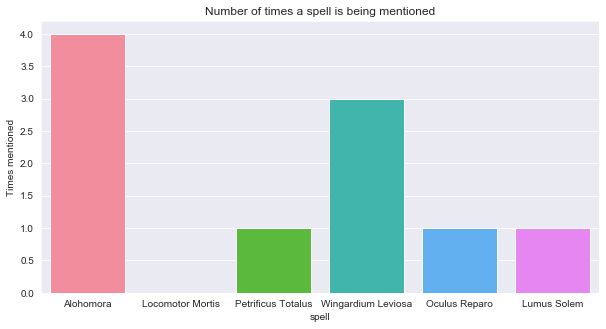

In [16]:
spell_list = [['Alohomora', Alohomora], ['Locomotor Mortis', Locomotor_Mortis], ['Petrificus Totalus', Petrificus_Totalus], ['Wingardium Leviosa', Wingardium_Leviosa], ['Oculus Reparo', Oculus_Reparo], ['Lumus Solem', Lumus_Solem]]
df_spell_movie=pd.DataFrame(spell_list, columns=['spell', 'Times mentioned'])
colors = ["rose", "gold", "salmon", "blue", "green"]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="spell", y="Times mentioned", saturation=0.9, data=df_spell_movie).set_title("Number of times a spell is being mentioned")

In [17]:
Lumus_Solem

1

## Book

In [18]:
#pip install PyPDF2


In [19]:
#pip install nltk

In [20]:
import PyPDF2 

In [21]:
#write a for-loop to open many files -- leave a comment if you'd #like to learn how
filename = 'harry_potter_and_the_sorcerers_stone.pdf' 
#open allows you to read the file
pdfFileObj = open(filename,'rb')
#The pdfReader variable is a readable object that will be parsed
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#discerning the number of pages will allow us to parse through all #the pages
num_pages = pdfReader.numPages
count = 0
text = ""
#The while loop will read each page
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
#This if statement exists to check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.
if text != "":
    text = text
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text
else:
    text = textract.process(fileurl, method='tesseract', language='eng')
# Now we have a text variable which contains all the text derived #from our PDF file. Type print(text) to see what it contains. It #likely contains a lot of spaces, possibly junk such as '\n' etc.
# Now, we will clean our text variable, and return it as a list of keywords.

In [22]:
text

' Harry Potter and the Sorcerer™s Stone  By J.K. Rowling \n   CHAPTER ONE \n  The Boy Who Lived  \n      Mr. and Mrs. Dursley, of number four, Privet\n Drive, were proud to say that they were perfectly normal, thank you very much. They were the last\n people you™d expect to be involved in anything strange or mysterious, because they just didn™t hold with such nonsense.  \n      Mr. Dursley was the director of a firm \ncalled Grunnings, which made drills. He was a big, beefy \nman with hardly any neck, although he did have \na very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she \nspent so much of her time craning over garden\n fences, spying on the neighbors. The Dursleys had a small son called Dudley and in thei\nr opinion there was no finer boy anywhere.  \n      The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was \nthat somebody would discover it. They didn™t

In [23]:
clean_lines2 = []
a = re.sub('(\n)', '', str(text))
b = re.sub('™', "'", a)
c = re.sub('Š', ' - ', b)

d = re.sub('(ﬁ)', '"', c)
e = re.sub('(ﬂ)', '"', d)
f = re.sub('(\s\s+)', ' ', e)
clean_lines2.append(f)
print(clean_lines2)

[' Harry Potter and the Sorcerer\'s Stone By J.K. Rowling CHAPTER ONE The Boy Who Lived Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you\'d expect to be involved in anything strange or mysterious, because they just didn\'t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn\'t think they could bear it if anyone found out abou

In [24]:
import collections
import re
import matplotlib.pyplot as plt
#% matplotlib inline
#file = open('PrideAndPrejudice.txt', 'r')
file = clean_lines2
stopwords = set(line.strip() for line in clean_lines2)
stopwords = stopwords.union(set(['a', 'i', 'mr', 'ms', 'mrs', 'one', 'two', 'said', 'and', 'the', 'is', 'was']))
wordcount = collections.defaultdict(int)
 
#the next paragraph does all the counting and is the main point of difference from the original article. More on this is explained later.

# \W is regex for characters that are not alphanumerics.
# all non-alphanumerics are replaced with a blank space using re.sub
pattern = r"\W"
for word in clean_lines2:
    word = re.sub(pattern, ' ', word)
    if word not in stopwords:
        wordcount[word] += 1
# printing most common words
#to_print = int(input("How many top words do you wish to print?"))
#print(f"The most common {n} words are:")
# the next line sorts the default dict on the values in decreasing  # order and prints the first "to_print".
mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)
#[:to_print] # this is continued from the previous assignment
#for word, count in mc:
#    print(word, ":", count)
# Draw the bart chart
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
plt.savefig('bar.png')
plt.show()

ValueError: Image size of 1917339x247 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [25]:
from collections import Counter

In [26]:
verbs_Harry = re.findall(r"\bHarry (\w*)", str(clean_lines2))
verbs_Harry

['Potter',
 '',
 'Potter',
 'survive',
 'to',
 'Potter',
 'Potter',
 '',
 'underneath',
 'in',
 'and',
 'off',
 'gently',
 'Potter',
 'Potter',
 'Potter',
 'woke',
 'heard',
 'groaned',
 'got',
 'was',
 'didn',
 'had',
 'had',
 'liked',
 'was',
 'needed',
 'must',
 'was',
 'often',
 'put',
 'and',
 'was',
 'hated',
 'as',
 'knew',
 'like',
 'put',
 'a',
 'aside',
 'and',
 'coming',
 'wasn',
 'had',
 'supposed',
 'were',
 'what',
 'thought',
 'had',
 'was',
 'felt',
 'moved',
 'stared',
 'a',
 'murmured',
 'asked',
 'peered',
 'read',
 'made',
 'in',
 'fell',
 'sat',
 'could',
 'had',
 'at',
 'was',
 'lay',
 'had',
 'furiously',
 'tried',
 'had',
 'Potter',
 'his',
 'was',
 'Hunting',
 'spent',
 'at',
 'watch',
 'didn',
 'went',
 'looked',
 'seriously',
 'get',
 'dodged',
 'picked',
 'saw',
 'went',
 'was',
 'and',
 'furiously',
 'didn',
 'and',
 'and',
 'could',
 'in',
 'angrily',
 '',
 'one',
 'sighed',
 'was',
 'right',
 'had',
 'walked',
 'turned',
 'leapt',
 'realized',
 'didn',
 '

In [27]:
verbs_Hermione = re.findall(r"\bHermione (\w*)", str(clean_lines2))
verbs_Hermione

['Granger',
 'Granger',
 'Granger',
 'in',
 'Granger',
 'whisper',
 'almost',
 'were',
 'Granger',
 'a',
 'Granger',
 'stretched',
 'stood',
 'does',
 'Granger',
 'Granger',
 'Granger',
 'Granger',
 'ignored',
 'Granger',
 'snapped',
 'wasn',
 'had',
 'was',
 'caught',
 'and',
 'opened',
 'gasped',
 'said',
 'snarled',
 'had',
 'had',
 'showed',
 'was',
 'was',
 'marched',
 'Granger',
 'was',
 'snap',
 'rolled',
 'didn',
 'was',
 'out',
 'Granger',
 'had',
 'who',
 'had',
 'Granger',
 'hung',
 'was',
 'left',
 'Granger',
 'as',
 'had',
 'moved',
 'sat',
 'was',
 'he',
 'joined',
 'had',
 'squeezed',
 'seized',
 'gasped',
 'had',
 'had',
 'and',
 'looked',
 'took',
 'had',
 'joined',
 'playing',
 'ever',
 'at',
 'suggested',
 'asked',
 'urged',
 'had',
 'jumped',
 'told',
 'ignored',
 'were',
 'had',
 'muttered',
 'suddenly',
 'stood',
 'screamed',
 'in',
 'squeaked',
 'in',
 'would',
 'snapped',
 'next',
 'thoughtfully',
 'in',
 'went',
 'were',
 'didn',
 'had',
 'wouldn',
 'argued',
 

In [28]:
verbs_Ron = re.findall(r"\bRon (\w*)", str(clean_lines2))
verbs_Ron

['again',
 'blurted',
 'stared',
 'eagerly',
 'just',
 'found',
 'reached',
 'so',
 'up',
 'gasped',
 'stared',
 'had',
 'sounded',
 'was',
 'warned',
 'picked',
 'wouldn',
 'in',
 'looked',
 'Weasley',
 'muttered',
 'asked',
 'looked',
 'gave',
 'stood',
 'said',
 '',
 'leapt',
 'picking',
 'said',
 'darkly',
 'glared',
 'took',
 'were',
 'behind',
 'whispered',
 'groaned',
 'collapsed',
 'suddenly',
 'muttered',
 'if',
 'managed',
 'didn',
 'as',
 'exchanged',
 'kicked',
 'and',
 'pretended',
 'were',
 'told',
 'telling',
 'hadn',
 'walked',
 'reasonably',
 'would',
 'had',
 'couldn',
 'prodding',
 'jumped',
 'were',
 'and',
 'what',
 'had',
 'was',
 'and',
 'casually',
 'suggested',
 'muttered',
 'had',
 'muttered',
 'furiously',
 'through',
 'loudly',
 'looked',
 'exactly',
 'whispered',
 'around',
 'moaned',
 'finally',
 'stared',
 'were',
 'thought',
 'in',
 'to',
 'moaned',
 'couldn',
 'grinned',
 'could',
 'headed',
 'to',
 'sighed',
 'or',
 'snarled',
 'was',
 'overheard',
 'l

In [29]:
Counter(verbs_Harry).most_common(50)

[('and', 69),
 ('had', 58),
 ('was', 45),
 ('Potter', 29),
 ('could', 22),
 ('looked', 22),
 ('didn', 21),
 ('felt', 20),
 ('couldn', 17),
 ('thought', 16),
 ('asked', 16),
 ('', 12),
 ('told', 12),
 ('said', 11),
 ('tried', 10),
 ('saw', 10),
 ('heard', 9),
 ('as', 9),
 ('knew', 9),
 ('turned', 9),
 ('noticed', 9),
 ('in', 8),
 ('went', 8),
 ('whispered', 8),
 ('stared', 7),
 ('to', 6),
 ('got', 6),
 ('sat', 6),
 ('pulled', 6),
 ('shook', 6),
 ('leaned', 6),
 ('a', 5),
 ('moved', 5),
 ('made', 5),
 ('picked', 5),
 ('with', 5),
 ('jumped', 5),
 ('took', 5),
 ('watched', 5),
 ('gasped', 5),
 ('nodded', 5),
 ('woke', 4),
 ('wasn', 4),
 ('were', 4),
 ('at', 4),
 ('walked', 4),
 ('wished', 4),
 ('called', 4),
 ('on', 4),
 ('suddenly', 4)]

In [30]:
Counter(verbs_Hermione).most_common(30)

[('Granger', 17),
 ('had', 17),
 ('was', 11),
 ('in', 6),
 ('were', 5),
 ('and', 5),
 ('didn', 5),
 ('looked', 4),
 ('stood', 3),
 ('gasped', 3),
 ('said', 3),
 ('screamed', 3),
 ('ignored', 2),
 ('snapped', 2),
 ('as', 2),
 ('joined', 2),
 ('seized', 2),
 ('took', 2),
 ('at', 2),
 ('suggested', 2),
 ('tried', 2),
 ('whisper', 1),
 ('almost', 1),
 ('a', 1),
 ('stretched', 1),
 ('does', 1),
 ('wasn', 1),
 ('caught', 1),
 ('opened', 1),
 ('snarled', 1)]

In [31]:
Counter(verbs_Ron).most_common(30)

[('and', 30),
 ('in', 10),
 ('was', 9),
 ('had', 8),
 ('muttered', 7),
 ('said', 7),
 ('were', 5),
 ('looked', 4),
 ('whispered', 4),
 ('didn', 4),
 ('to', 4),
 ('stared', 3),
 ('asked', 3),
 ('couldn', 3),
 ('moaned', 3),
 ('thought', 3),
 ('sighed', 3),
 ('went', 3),
 ('gasped', 2),
 ('warned', 2),
 ('wouldn', 2),
 ('gave', 2),
 ('stood', 2),
 ('', 2),
 ('suddenly', 2),
 ('as', 2),
 ('would', 2),
 ('finally', 2),
 ('could', 2),
 ('pulled', 2)]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')

X = count_vectorizer.fit_transform(verbs_Harry)
harry_w = count_vectorizer.get_feature_names()
harry_w

['added',
 'advised',
 'angrily',
 'anxiously',
 'aside',
 'asked',
 'away',
 'awkwardly',
 'began',
 'bellowed',
 'blankly',
 'blew',
 'bolted',
 'borrowed',
 'breathed',
 'breathlessly',
 'broke',
 'brought',
 'buy',
 'called',
 'caught',
 'cheered',
 'choked',
 'chortled',
 'clambered',
 'clapped',
 'clean',
 'climbed',
 'clinging',
 'clutching',
 'coldly',
 'coming',
 'confessed',
 'coolly',
 'cost',
 'couldn',
 'counted',
 'croaked',
 'crossed',
 'cut',
 'darkly',
 'decided',
 'did',
 'didn',
 'dodged',
 'doesn',
 'dropped',
 'eagerly',
 'entered',
 'expected',
 'explained',
 'feared',
 'fell',
 'felt',
 'filled',
 'finally',
 'flatly',
 'flushed',
 'followed',
 'forced',
 'frantically',
 'furiously',
 'gasped',
 'gently',
 'glanced',
 'gloomily',
 'got',
 'grabbed',
 'grinned',
 'gripped',
 'groaned',
 'groped',
 'gulped',
 'hadn',
 'handed',
 'hanging',
 'hardly',
 'hasn',
 'hated',
 'headed',
 'heard',
 'helped',
 'hissed',
 'holding',
 'hung',
 'hunting',
 'ignored',
 'joined'

In [33]:

wordcloud = WordCloud(background_color="white", palette='hot').generate(str(harry_w))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TypeError: __init__() got an unexpected keyword argument 'palette'

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
#text = open(path.join(d, 'harry_w')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
harry_mask = np.array(Image.open(path.join(d, "harry.png")))

stopwords = set(STOPWORDS)


wc = WordCloud(background_color="white", max_words=2000, mask=harry_mask,
               stopwords=stopwords, contour_width=1, contour_color='black', relative_scaling=1)

# generate word cloud
wc.generate(str(harry_w))

# store to file
wc.to_file(path.join(d, "harry_words.jpg"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(harry_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
Harry_words = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())
Harry_words.head()

In [34]:
Alohomora = re.findall(r"(Alohomora)", str(clean_lines2))
Counter(Alohomora)


Counter({'Alohomora': 2})

In [35]:
Locomotor_Mortis = re.findall(r"(Locomotor Mortis)", str(clean_lines2))
Counter(Locomotor_Mortis)

Counter({'Locomotor Mortis': 1})

In [36]:
Petrificus_Totalus = re.findall(r"(Petrificus Totalus)", str(clean_lines2))
Counter(Petrificus_Totalus)

Counter({'Petrificus Totalus': 1})

In [37]:
Wingardium_Leviosa = re.findall(r"(Wingardium Leviosa)", str(clean_lines2))
Counter(Wingardium_Leviosa)

Counter({'Wingardium Leviosa': 3})

In [38]:
Lumus_solem = re.findall(r"(Lumus Solem)", str(clean_lines2))
Counter(Lumus_solem)

Counter()

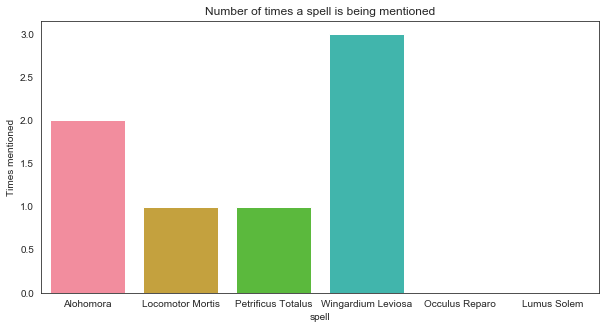

In [39]:
Alohomora = str(clean_lines2).count("Alohomora")
Locomotor_Mortis = str(clean_lines2).count("Locomotor Mortis")
Petrificus_Totalus = str(clean_lines2).count("Petrificus Totalus")
Wingardium_Leviosa = str(clean_lines2).count("Wingardium Leviosa")
Occulus_Reparo = str(clean_lines2).count("Occulus Reparo")
Lumus_Solem = str(clean_lines2).count('Lumus Solem')
spell_list = [['Alohomora', Alohomora], ['Locomotor Mortis', Locomotor_Mortis], ['Petrificus Totalus', Petrificus_Totalus], ['Wingardium Leviosa', Wingardium_Leviosa], ['Occulus Reparo', Occulus_Reparo], ['Lumus Solem', Lumus_Solem]]
df_spell=pd.DataFrame(spell_list, columns=['spell', 'Times mentioned'])
colors = ["rose", "gold", "salmon", "blue", "green"]
sns.set_style("white")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="spell", y="Times mentioned", saturation=0.9, data=df_spell).set_title("Number of times a spell is being mentioned")

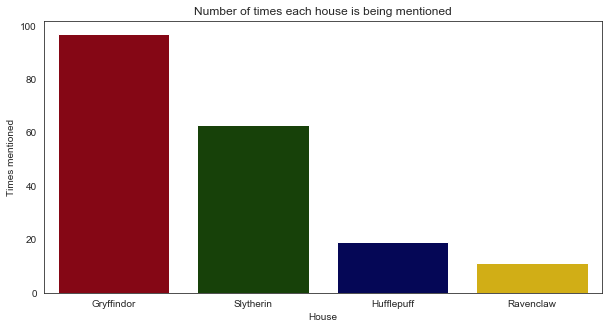

In [49]:
Slytherin = str(clean_lines2).count("Slytherin")
Gryffindor = str(clean_lines2).count("Gryffindor")
Hufflepuff = str(clean_lines2).count("Hufflepuff")
Ravenclaw = str(clean_lines2).count("Ravenclaw")
house_list = [['Gryffindor', Gryffindor], ['Slytherin', Slytherin], ['Hufflepuff', Hufflepuff], ['Ravenclaw', Ravenclaw]]
df_house=pd.DataFrame(house_list, columns=['House', 'Times mentioned'])
colors = ["crimson", "forrest green", "dark blue", "gold"]
sns.set_style("white")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="House", y="Times mentioned", saturation=0.9, data=df_house).set_title("Number of times each house is being mentioned")

### Harry Potter book 2

In [40]:

filename = 'harry_potter_and_the_chamber_of_secrets.pdf' 

pdfFileObj = open(filename,'rb')

pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

num_pages = pdfReader.numPages
count = 0
text = ""
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
if text != "":
    text = text
else:
    text = textract.process(fileurl, method='tesseract', language='eng')


In [41]:
text

'Harry Potter and the Chamber of Secrets  By J.K. Rowling \n     CHAPTER ONE \n  \nThe Worst Birthday  Not for the first time, an argument had broken out\n over breakfast at number four, Privet Drive. \nMr. Vernon Dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew Harry™s room. \n \n      ﬁThird time this week!ﬂ he roared across th\ne table. ﬁIf you can™t control that owl, it™ll have to go!ﬂ  \n      Harry tried, yet again, to explain. \n \n      ﬁShe™s bored\n,ﬂ he said. ﬁShe™s used to flying around outside. If I could just let her out at night -ﬂ  \n      ﬁDo I look stupid?ﬂ snarled Uncle Vernon, a bit of fried egg dangling from his bushy mustache. \nﬁI know what™ll happen if that owl™s let out.ﬂ \n \n      He exchanged dark looks with his wife, Petunia.        Harry tried to argue back but his words were drowned by a long, loud belch from the Dursleys™ \nson, Dudley.  \n      ﬁI want more bacon.ﬂ \n \n      ﬁThere™s more in the frying p

In [42]:
clean_lines_book2 = []
a = re.sub('(\n)', '', str(text))
b = re.sub('™', "'", a)
c = re.sub('Š', ' - ', b)

d = re.sub('(ﬁ)', '"', c)
e = re.sub('(ﬂ)', '"', d)
f = re.sub('(\s\s+)', ' ', e)
clean_lines_book2.append(f)
print(clean_lines_book2)

['Harry Potter and the Chamber of Secrets By J.K. Rowling CHAPTER ONE The Worst Birthday Not for the first time, an argument had broken out over breakfast at number four, Privet Drive. Mr. Vernon Dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew Harry\'s room. "Third time this week!" he roared across the table. "If you can\'t control that owl, it\'ll have to go!" Harry tried, yet again, to explain. "She\'s bored," he said. "She\'s used to flying around outside. If I could just let her out at night -" "Do I look stupid?" snarled Uncle Vernon, a bit of fried egg dangling from his bushy mustache. "I know what\'ll happen if that owl\'s let out." He exchanged dark looks with his wife, Petunia. Harry tried to argue back but his words were drowned by a long, loud belch from the Dursleys\' son, Dudley. "I want more bacon." "There\'s more in the frying pan, sweetums," said Aunt Petunia, turning misty eyes on her massive son. "We must build you up 

In [ ]:
Alohomora = str(clean_lines_book2).count("Alohomora")
Locomotor_Mortis = str(clean_lines_book2).count("Locomotor Mortis")
Petrificus_Totalus = str(clean_lines_book2).count("Petrificus Totalus")
Wingardium_Leviosa = str(clean_lines_book2).count("Wingardium Leviosa")
Occulus_Reparo = str(clean_lines_book2).count("Occulus Reparo")
Lumus_Solem = str(clean_lines_book2).count('Lumus Solem')

spell_list_book2 = [['Alohomora', Alohomora], ['Locomotor Mortis', Locomotor_Mortis], ['Petrificus Totalus', Petrificus_Totalus], ['Wingardium Leviosa', Wingardium_Leviosa], ['Occulus Reparo', Occulus_Reparo], ['Lumus Solem', Lumus_Solem]]
df_spell_book2=pd.DataFrame(spell_list_book2, columns=['spell', 'Times mentioned'])


In [ ]:
Slytherin = str(clean_lines_book2).count("Slytherin")
Gryffindor = str(clean_lines_book2).count("Gryffindor")
Hufflepuff = str(clean_lines_book2).count("Hufflepuff")
Ravenclaw = str(clean_lines_book2).count("Ravenclaw")
house_list = [['Gryffindor', Gryffindor], ['Slytherin', Slytherin], ['Hufflepuff', Hufflepuff], ['Ravenclaw', Ravenclaw]]
df_house=pd.DataFrame(house_list, columns=['House', 'Times mentioned'])
colors = ["crimson", "forrest green", "dark blue", "gold"]
sns.set_style("white")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="House", y="Times mentioned", saturation=0.9, data=df_house).set_title("Number of times each house is being mentioned in book 2")

### Harry Potter book 3

In [ ]:
filename = 'harry_potter_and_the_prisoner_of_azkaban.pdf' 

pdfFileObj = open(filename,'rb')

pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

num_pages = pdfReader.numPages
count = 0
text = ""
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
if text != "":
    text = text
else:
    text = textract.process(fileurl, method='tesseract', language='eng')

In [ ]:
text

In [ ]:
clean_lines_book3 = []
a = re.sub('(\n)', '', str(text))
b = re.sub('™', "'", a)
c = re.sub('Š', ' - ', b)

d = re.sub('(ﬁ)', '"', c)
e = re.sub('(ﬂ)', '"', d)
f = re.sub('(\s\s+)', ' ', e)
clean_lines_book3.append(f)
print(clean_lines_book3)

In [ ]:
Slytherin = str(clean_lines_book3).count("Slytherin")
Gryffindor = str(clean_lines_book3).count("Gryffindor")
Hufflepuff = str(clean_lines_book3).count("Hufflepuff")
Ravenclaw = str(clean_lines_book3).count("Ravenclaw")
house_list = [['Gryffindor', Gryffindor], ['Slytherin', Slytherin], ['Hufflepuff', Hufflepuff], ['Ravenclaw', Ravenclaw]]
df_house=pd.DataFrame(house_list, columns=['House', 'Times mentioned'])
colors = ["crimson", "forrest green", "dark blue", "gold"]
sns.set_style("white")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="House", y="Times mentioned", saturation=0.9, data=df_house).set_title("Number of times each house is being mentioned in book 3")

### spells

In [48]:
spells = ["Accio",
"Aguamenti",
"Alarte Ascendare",
"Alohomora",
"Anapneo",
"Anteoculatia",
"Aparecium",
"Appare Vestigium",
"Aqua Eructo",
"Arania Exumai",
"Arresto Momentum",
"Ascendio",
"Avada Kedavra",
"Avifors",
"Avenseguim",
"Avis",
"Baubillious",
"Bombarda",
"Bombarda Maxima",
"Brackium Emendo",
"Calvorio",
"Cantis",
"Capacious extremis",
"Carpe Retractum",
"Cave inimicum",
"Circumrota",
"Cistem Aperio",
"Colloportus",
"Colloshoo",
"Colovaria",
"Confringo",
"Confundo",
"Crinus Muto",
"Crucio",
"Defodio",
"Deletrius",
"Densaugeo",
"Deprimo",
"Depulso",
"Descendo",
"Diffindo",
"Diminuendo",
"Dissendium",
"Draconifors",
"Ducklifors",
"Duro",
"Ebublio",
"Engorgio",
"Engorgio Skullus",
"Entomorphis",
"Epoximise",
"Erecto",
"Evanesce",
"Evanesco",
"Everte Statum",
"Expecto Patronum",
"Expelliarmus",
"Expulso",
"Ferula",
"Fianto Duri",
"Finestra",
"Finite",
"Flagrante",
"Flagrate",
"Flintifors",
"Flipendo",
"Flipendo",
"Flipendo Tria",
"Fumos",
"Fumos Duo",
"Furnunculus",
"Geminio",
"Glacius",
"Glacius Duo",
"Glacius Tria",
"Glisseo",
"Harmonia Nectere Passus",
"Herbifors",
"Herbivicus",
"Homenum Revelio",
"Illegibilus",
"Immobulus",
"Impedimenta",
"Imperio",
"Impervius", 
"Incarcerous",
"Incendio",
"Incendio",
"Incendio Tria",
"Inflatus",
"Informous",
"Locomotor Wibbly",
"Lacarnum Inflamari",
"Langlock",
"Lapifors",
"Legilimens",
"Levicorpus",
"Liberacorpus",
"Locomotor",
"Locomotor Mortis",
"Lumos",
"Lumos Duo",
"Lumos Maxima",
"Lumos Solem",
"Magicus Extremos",
"Melofors",
"Meteolojinx Recanto",
"Mimblewimble",
"Mobiliarbus",
"Mobilicorpus",
"Molliare",
"Morsmordre",
"Mucus ad Nauseam",
"Muffliato",
"Multicorfors", 
"Mutatio Skullus",
"Nox",
"Nebulus",
"Oculus Reparo",
"Obliviate",
"Obscuro",
"Oppugno", 
"Orbis",
"Orchideous",
"Oscausi",
"Pack",
"Papyrus Reparo",
"Partis Temporus",
"Periculum",
"Peskipiksi Pesternomi",
"Petrificus Totalus",
"Piertotum Locomotor",
"Piscifors",
"Point Me",
"Portus",
"Prior Incantato",
"Protego",
"Protego Diabolica",
"Protego horribilis",
"Protego Maxima",
"Protego totalum",
"Quietus",
"Redactum Skullus",
"Reducio",
"Reducto",
"Reparifors",
"Reverte",
"Relashio",
"Rennervate",
"Reparifarge",
"Reparo",
"Repello Muggletum",
"Repello Inimicum",
"Revelio",
"Rictusempra",
"Riddikulus",
"Salvio hexia",
"Courgify",
"Sectumsempra",
"Serpensortia",
"Silencio",
"Skurge",
"Slugulus Eructo",
"Sonorus",
"Specialis Revelio",
"Spongify",
"Steleus",
"Stupefy",
"Surgito",
"Tarantallegra",
"Tentaclifors",
"Tergeo",
"Titillando",
"Ventus",
"Ventus Duo",
"Vera Verto",
"Verdillious",
"Verdimillious",
"Verdimillious",
"Vermiculus",
"Vermillious",
"Vipera Evanesca",
"Vulnera Sanentur",
"Waddiwasi",
"Wingardium Leviosa",
"Episkey"]